In [185]:
# Chargement et étude rapide du jeu de données Pima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
# Charger les données
Pima_DF = pd.read_csv('pima_data.csv')
Pima_DF.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,-1
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,-1
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,-1


In [187]:
# Renommer les colonnes et regarder les données manquantes (il n'y en a pas)
Pima_DF.columns = ['#G', 'Gly', 'PSD', 'MG','Ins','IMC','Risk', 'Age', 'Label']
Pima_DF.isnull().sum()

#G       0
Gly      0
PSD      0
MG       0
Ins      0
IMC      0
Risk     0
Age      0
Label    0
dtype: int64

-1    500
 1    267
Name: Label, dtype: int64


<Axes: xlabel='count', ylabel='Label'>

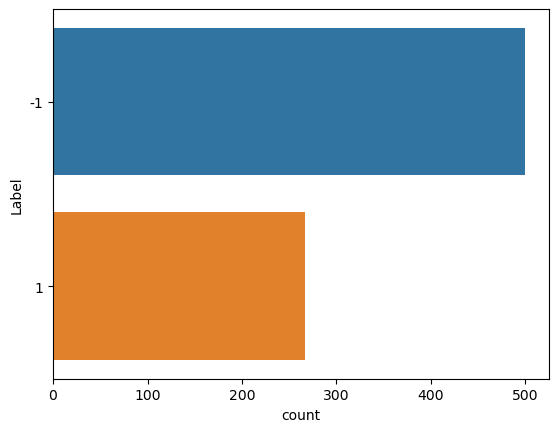

In [188]:
# Répartition graphique des réponses
print(Pima_DF.Label.value_counts())
sns.countplot(y="Label", data=Pima_DF)

<Axes: xlabel='Label', ylabel='Age'>

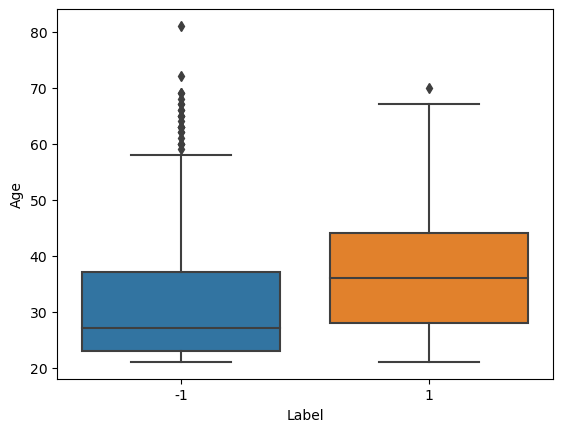

In [189]:
# Répartition graphique des exemples sur une variable spécifique
sns.boxplot(x='Label',y='Age',data=Pima_DF)

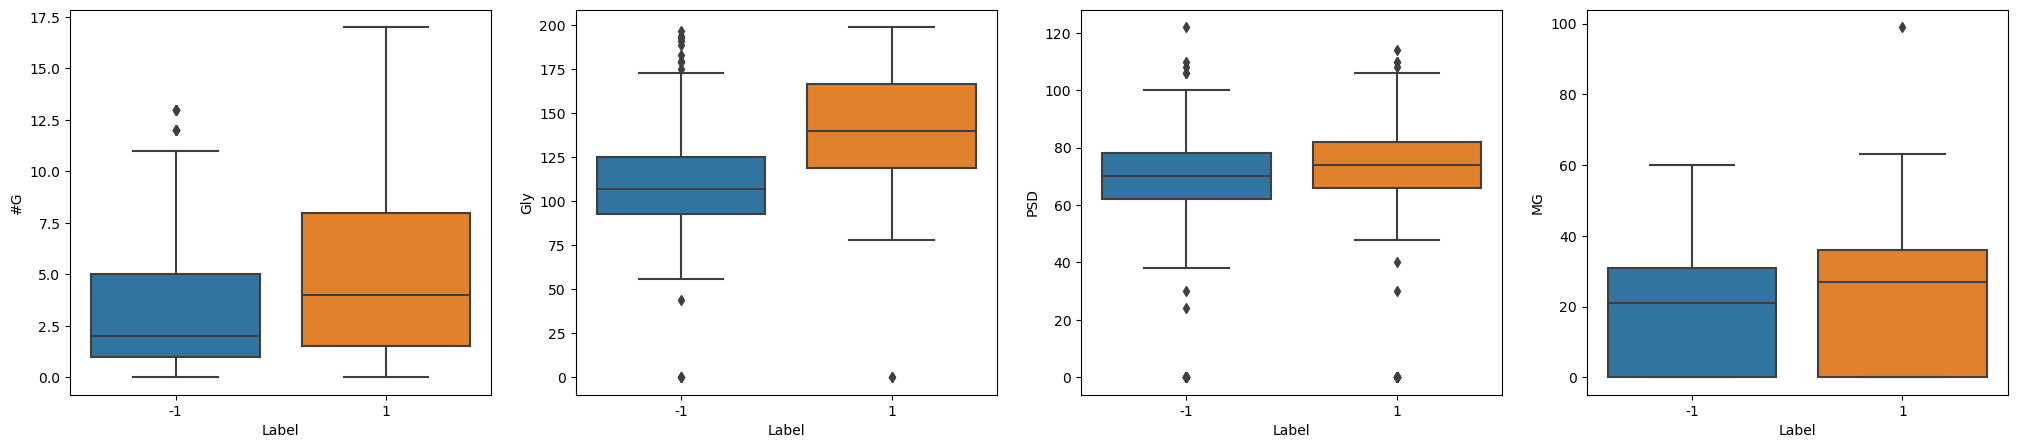

In [190]:
# Répartition graphique des exemples sur un tableau récapitulatif des 4 premières variables
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='Label',y='#G',data=Pima_DF)
plt.subplot(1,4,2)
sns.boxplot(x='Label',y='Gly',data=Pima_DF)
plt.subplot(1,4,3)
sns.boxplot(x='Label',y='PSD',data=Pima_DF)
plt.subplot(1,4,4)
sns.boxplot(x='Label',y='MG',data=Pima_DF);

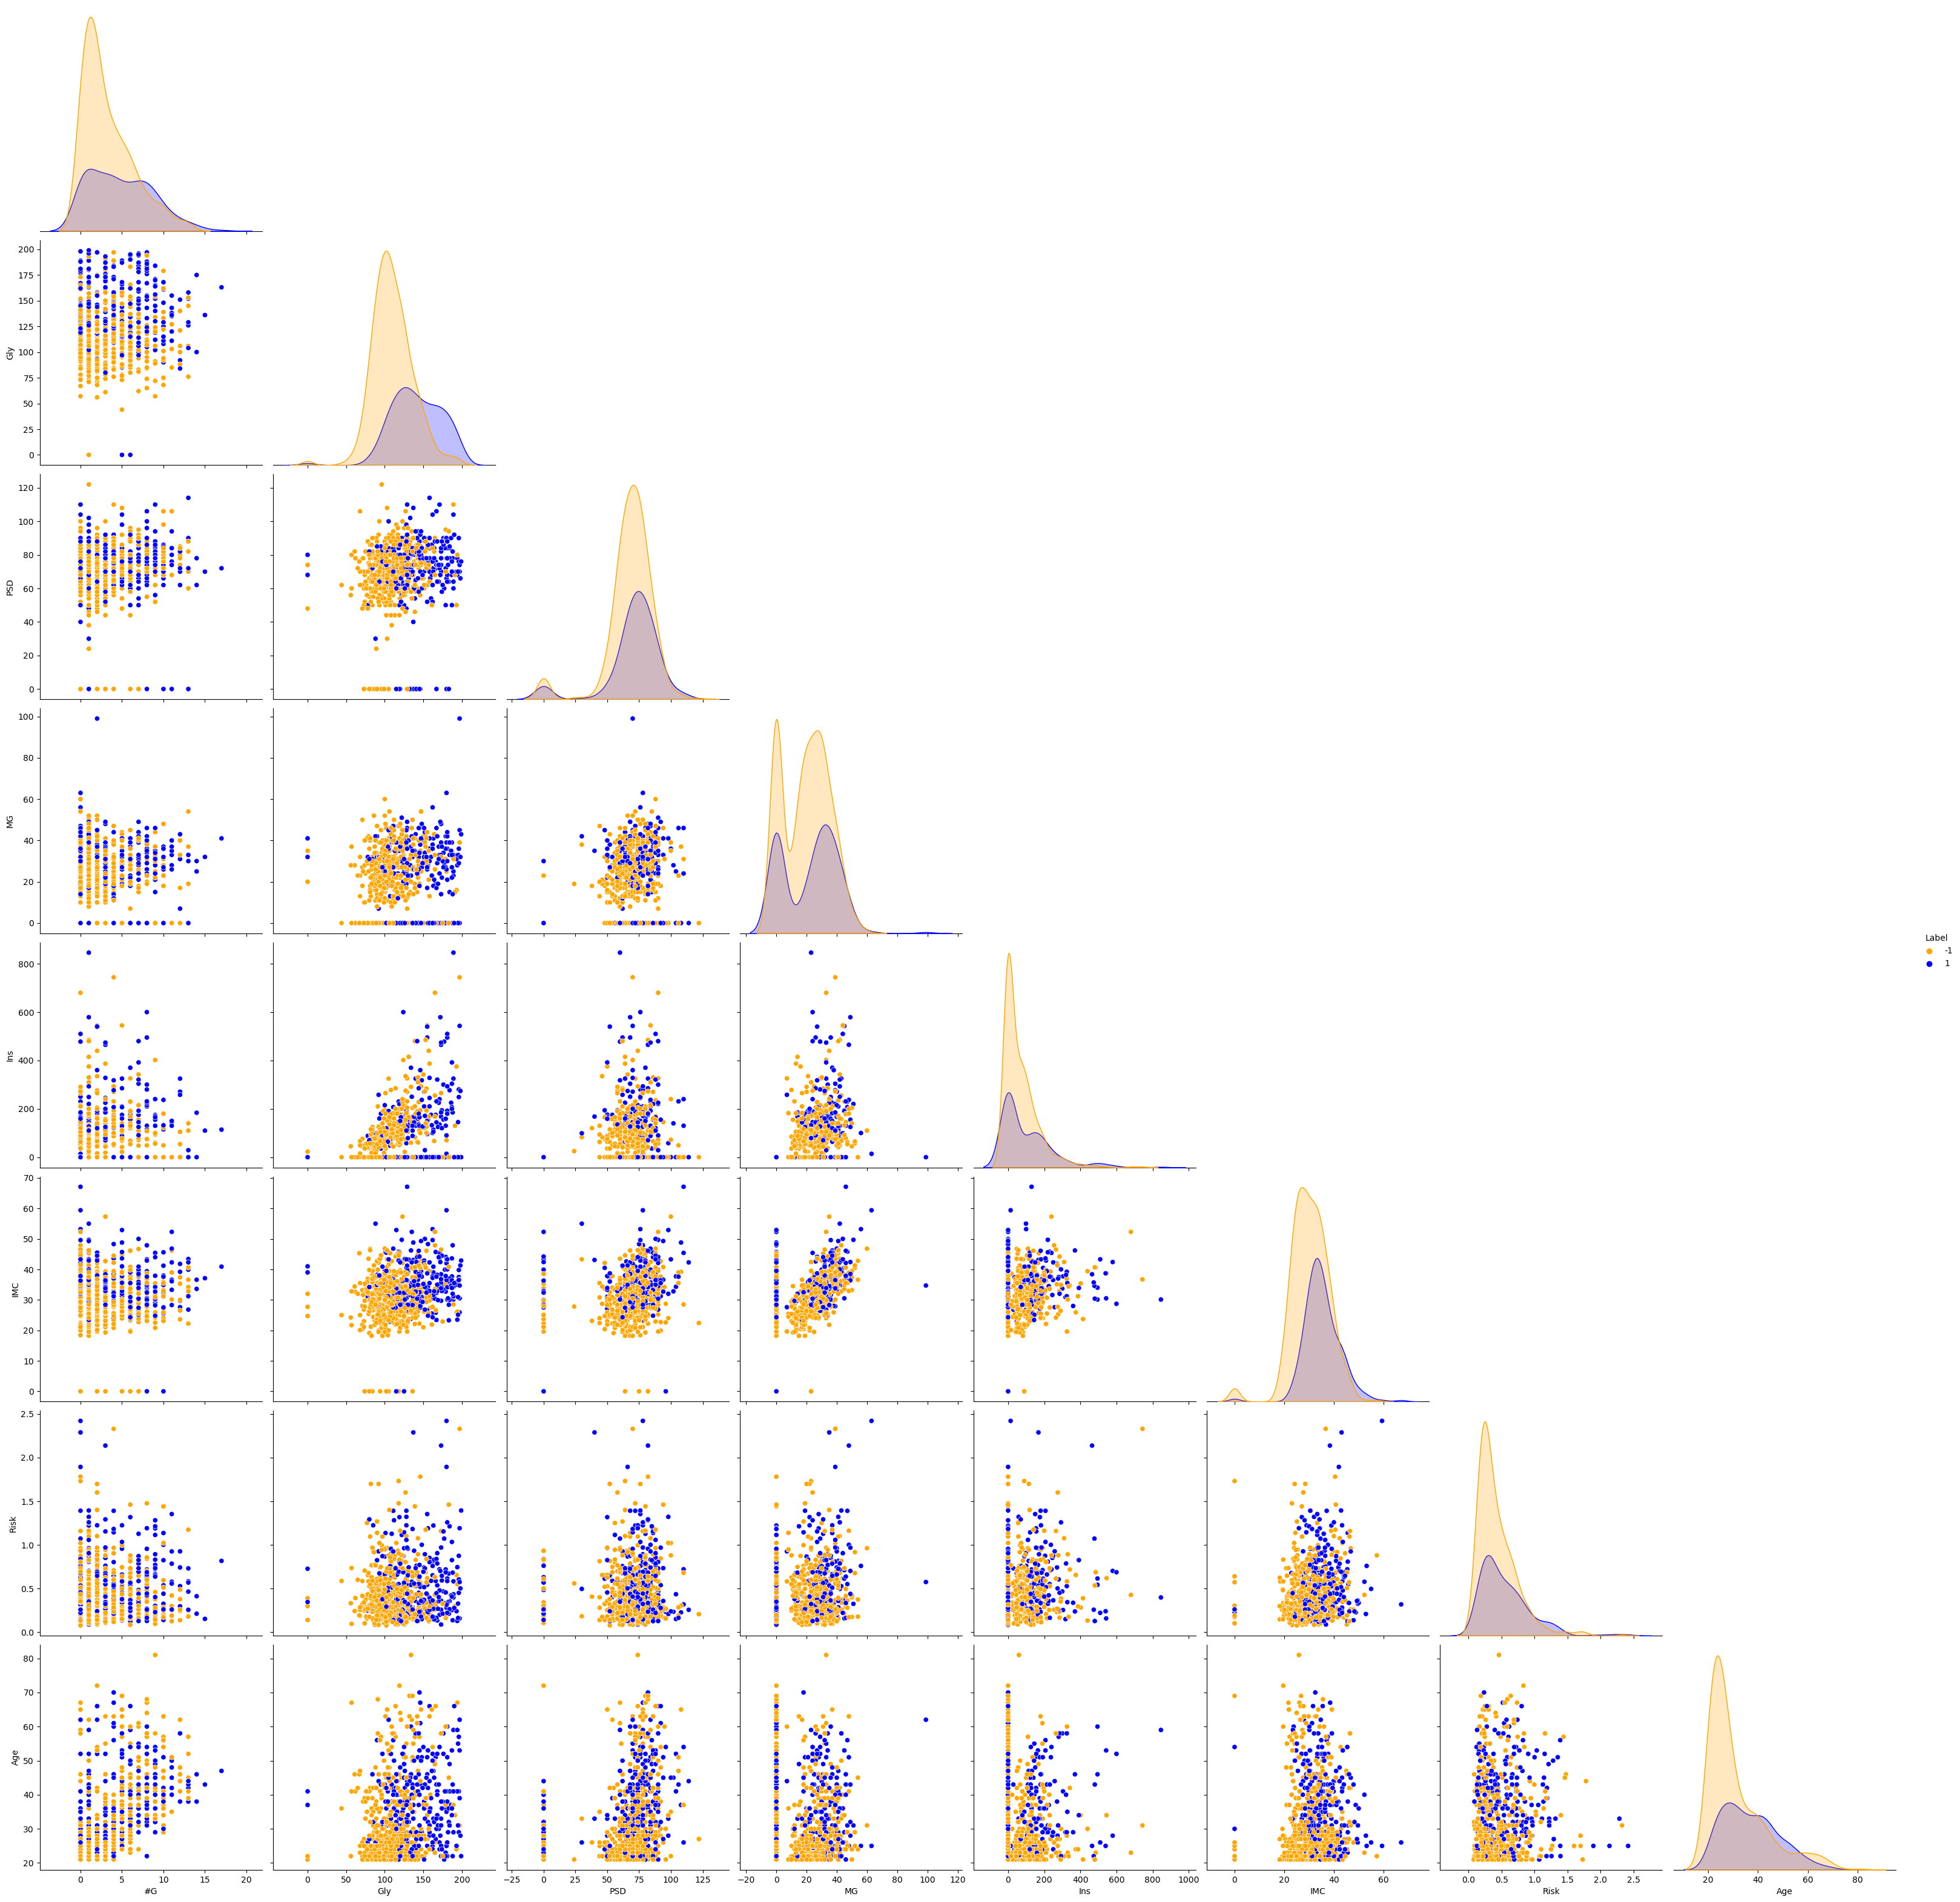

In [191]:
# Répartition graphique des exemples en fonction de toutes les combinaisons de variables 2 à 2
sns.pairplot(Pima_DF, hue='Label', corner = True, palette = ['orange', 'blue'], height=4)

<Axes: >

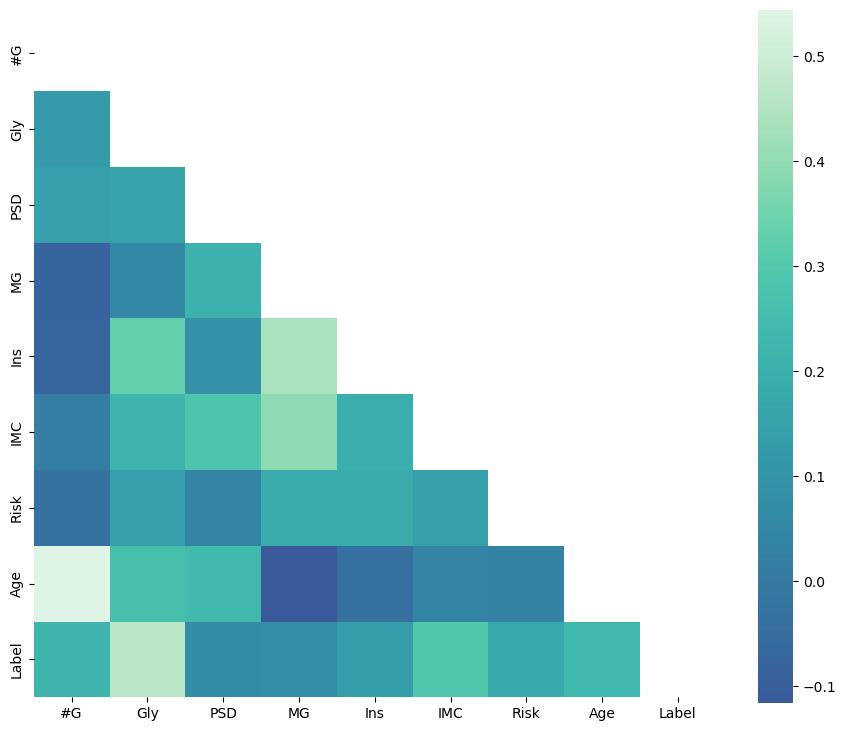

In [192]:
# Matrice de corrélations
Pima_corr = Pima_DF.corr()

# masque triangulaire
mask = np.triu(np.ones_like(Pima_corr, dtype=bool))

# matplolib setup
f, ax = plt.subplots(figsize=(11, 9))

# matrice de corrélationa vec masque trinagulaire inférieur
sns.heatmap(Pima_corr, mask=mask, cmap = 'mako', center=0, square=True)

In [193]:
Pima_DF

,#G,Gly,PSD,MG,Ins,IMC,Risk,Age,Label
0,1,85,66,29,0,26.6,0.351,31,-1
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,-1
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,-1
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,-1
763,2,122,70,27,0,36.8,0.340,27,-1
764,5,121,72,23,112,26.2,0.245,30,-1
765,1,126,60,0,0,30.1,0.349,47,1


In [194]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Y = Pima_DF['Label']  
X = Pima_DF.drop('Label', axis=1) 

X_1, X_2, Y_1, Y_2 = train_test_split(X, Y, test_size=0.5, random_state=42)

scaler = StandardScaler()

X_1 = scaler.fit_transform(X_1)

In [195]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

knn_classifier = KNeighborsClassifier(n_neighbors=5) 

knn_classifier.fit(X_1, Y_1)

Y_1_predicted = knn_classifier.predict(X_1)
Y_2_predicted = knn_classifier.predict(X_2)

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [196]:
accuracy_1 = accuracy_score(Y_1, Y_1_predicted)
accuracy_2 = accuracy_score(Y_2, Y_2_predicted)
print(accuracy_1, accuracy_2)

classification_report_1 = classification_report(Y_1, Y_1_predicted)
classification_report_2 = classification_report(Y_2, Y_2_predicted)
print(classification_report_1, classification_report_2)

roc_auc_1 = roc_auc_score(Y_1, Y_1_predicted)
roc_auc_2 = roc_auc_score(Y_2, Y_2_predicted)
print(roc_auc_1, roc_auc_2)

0.804177545691906 0.3333333333333333
              precision    recall  f1-score   support

          -1       0.81      0.90      0.85       244
           1       0.79      0.63      0.70       139

    accuracy                           0.80       383
   macro avg       0.80      0.77      0.78       383
weighted avg       0.80      0.80      0.80       383
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       256
           1       0.33      1.00      0.50       128

    accuracy                           0.33       384
   macro avg       0.17      0.50      0.25       384
weighted avg       0.11      0.33      0.17       384

0.7673664347210756 0.5


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


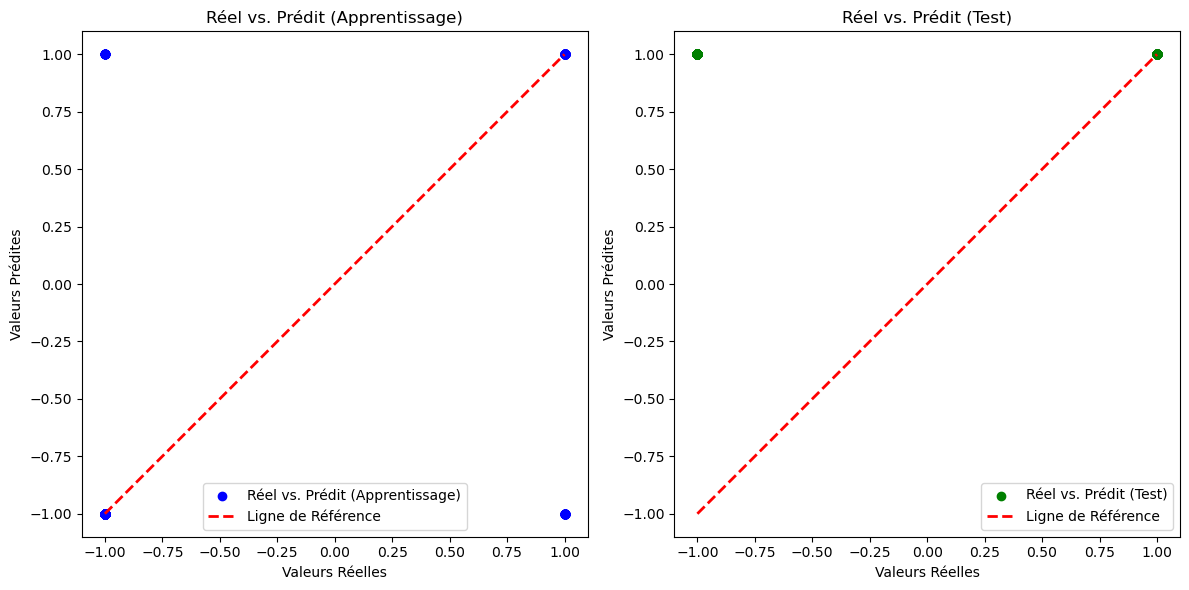

In [197]:
import matplotlib.pyplot as plt

# Scatter plot des résultats d'apprentissage
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_1, Y_1_predicted, color='blue', label='Réel vs. Prédit (Apprentissage)')
plt.plot([min(Y_1), max(Y_1)], [min(Y_1), max(Y_1)], linestyle='--', color='red', linewidth=2, label='Ligne de Référence')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Réel vs. Prédit (Apprentissage)')
plt.legend()

# Scatter plot des résultats de test
plt.subplot(1, 2, 2)
plt.scatter(Y_2, Y_2_predicted, color='green', label='Réel vs. Prédit (Test)')
plt.plot([min(Y_2), max(Y_2)], [min(Y_2), max(Y_2)], linestyle='--', color='red', linewidth=2, label='Ligne de Référence')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Réel vs. Prédit (Test)')
plt.legend()

plt.tight_layout()
plt.show()

/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being s

0.7754569190600522 0.3333333333333333
              precision    recall  f1-score   support

          -1       0.79      0.89      0.83       244
           1       0.75      0.58      0.65       139

    accuracy                           0.78       383
   macro avg       0.77      0.73      0.74       383
weighted avg       0.77      0.78      0.77       383
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       256
           1       0.33      1.00      0.50       128

    accuracy                           0.33       384
   macro avg       0.17      0.50      0.25       384
weighted avg       0.11      0.33      0.17       384

0.7324419153202029 0.5


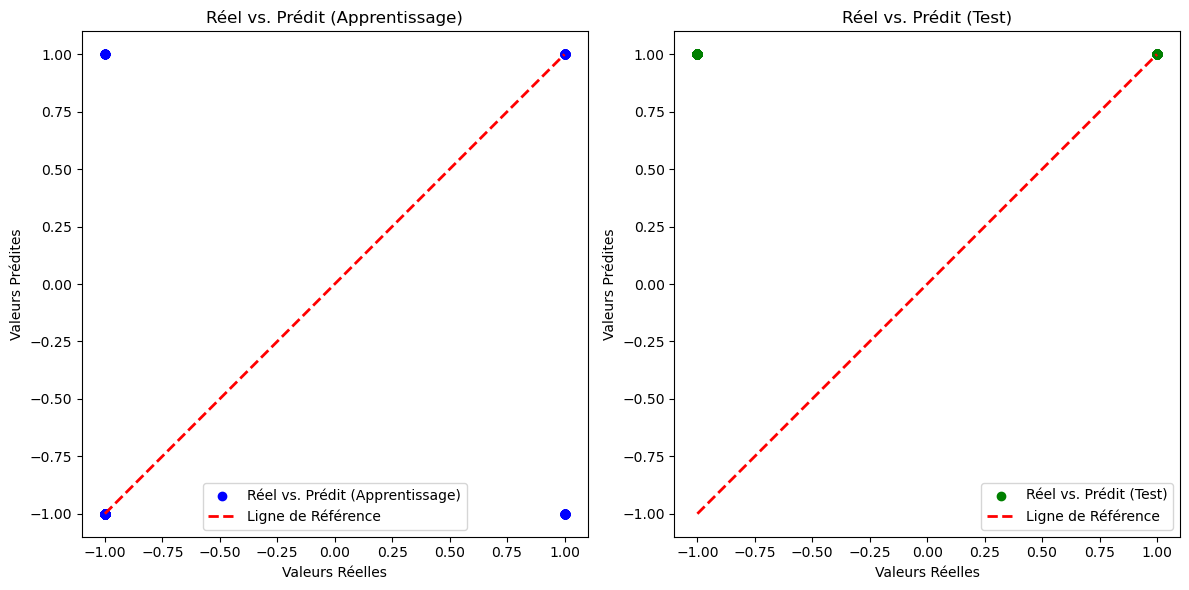

In [198]:
knn_classifier = KNeighborsClassifier(n_neighbors=15) 

knn_classifier.fit(X_1, Y_1)

Y_1_predicted = knn_classifier.predict(X_1)
Y_2_predicted = knn_classifier.predict(X_2)


accuracy_1 = accuracy_score(Y_1, Y_1_predicted)
accuracy_2 = accuracy_score(Y_2, Y_2_predicted)
print(accuracy_1, accuracy_2)

classification_report_1 = classification_report(Y_1, Y_1_predicted)
classification_report_2 = classification_report(Y_2, Y_2_predicted)
print(classification_report_1, classification_report_2)

roc_auc_1 = roc_auc_score(Y_1, Y_1_predicted)
roc_auc_2 = roc_auc_score(Y_2, Y_2_predicted)
print(roc_auc_1, roc_auc_2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_1, Y_1_predicted, color='blue', label='Réel vs. Prédit (Apprentissage)')
plt.plot([min(Y_1), max(Y_1)], [min(Y_1), max(Y_1)], linestyle='--', color='red', linewidth=2, label='Ligne de Référence')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Réel vs. Prédit (Apprentissage)')
plt.legend()

# Scatter plot des résultats de test
plt.subplot(1, 2, 2)
plt.scatter(Y_2, Y_2_predicted, color='green', label='Réel vs. Prédit (Test)')
plt.plot([min(Y_2), max(Y_2)], [min(Y_2), max(Y_2)], linestyle='--', color='red', linewidth=2, label='Ligne de Référence')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Réel vs. Prédit (Test)')
plt.legend()

plt.tight_layout()
plt.show()

## Exercice 2

In [199]:
Y = Pima_DF['Label']  
X = Pima_DF.drop('Label', axis=1) 

X_av, X_t, Y_av, Y_t = train_test_split(X, Y, test_size=0.5, random_state=42)
X_a, X_v, Y_a, Y_v = train_test_split(X_av, Y_av, test_size=0.33, random_state=42)

In [200]:
Y = Pima_DF['Label']  
X = Pima_DF.drop('Label', axis=1) 

scaler = StandardScaler()

X_av = scaler.fit_transform(X_av) 
X_a = scaler.fit_transform(X_a) # Référence
X_v = scaler.fit_transform(X_v)

In [201]:
p_k = [1, 5, 10, 15, 20, 25]
results = []

for i in p_k:
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_a, Y_a)

    Y_1_predicted = knn_classifier.predict(X_a)
    Y_2_predicted = knn_classifier.predict(X_v)

    accuracy_1 = accuracy_score(Y_a, Y_1_predicted)
    accuracy_2 = accuracy_score(Y_v, Y_2_predicted)

    classification_report_1 = classification_report(Y_a, Y_1_predicted, output_dict=True)
    classification_report_2 = classification_report(Y_v, Y_2_predicted, output_dict=True)

    roc_auc_1 = roc_auc_score(Y_a, Y_1_predicted)
    roc_auc_2 = roc_auc_score(Y_v, Y_2_predicted)


    precision_train = classification_report_1['-1']['precision']
    precision_test = classification_report_2['-1']['precision']

    recall_train = classification_report_1['-1']['recall']
    recall_test = classification_report_2['-1']['recall']

    f1_score_train = classification_report_1['-1']['f1-score']
    f1_score_test = classification_report_2['-1']['f1-score']

    results.append({
        'n_neighbors': i,
        'Accuracy_train': accuracy_1,
        'Accuracy_v': accuracy_2,
        'Precision_train': precision_train,
        'Precision_v': precision_test,
        'Recall_train': recall_train,
        'Recall_v': recall_test,
        'F1_Score_train': f1_score_train,
        'F1_Score_v': f1_score_test,
        'ROC_AUC_train': roc_auc_1,
        'ROC_AUC_v': roc_auc_2
    })

results_df = pd.DataFrame(results)

display(results_df)

,n_neighbors,Accuracy_train,Accuracy_v,Precision_train,Precision_v,Recall_train,Recall_v,F1_Score_train,F1_Score_v,ROC_AUC_train,ROC_AUC_v
0,1,1.000000,0.629921,1.000000,0.670732,1.000000,0.733333,1.000000,0.700637,1.000000,0.607051
1,5,0.800781,0.692913,0.820652,0.683673,0.893491,0.893333,0.855524,0.774566,0.757090,0.648590
2,10,0.761719,0.669291,0.759615,0.654206,0.934911,0.933333,0.838196,0.769231,0.680099,0.610897
3,15,0.761719,0.708661,0.775510,0.679245,0.899408,0.960000,0.832877,0.795580,0.696831,0.653077
4,20,0.730469,0.708661,0.735849,0.679245,0.923077,0.960000,0.818898,0.795580,0.639699,0.653077
5,25,0.742188,0.708661,0.746411,0.679245,0.923077,0.960000,0.825397,0.795580,0.656941,0.653077


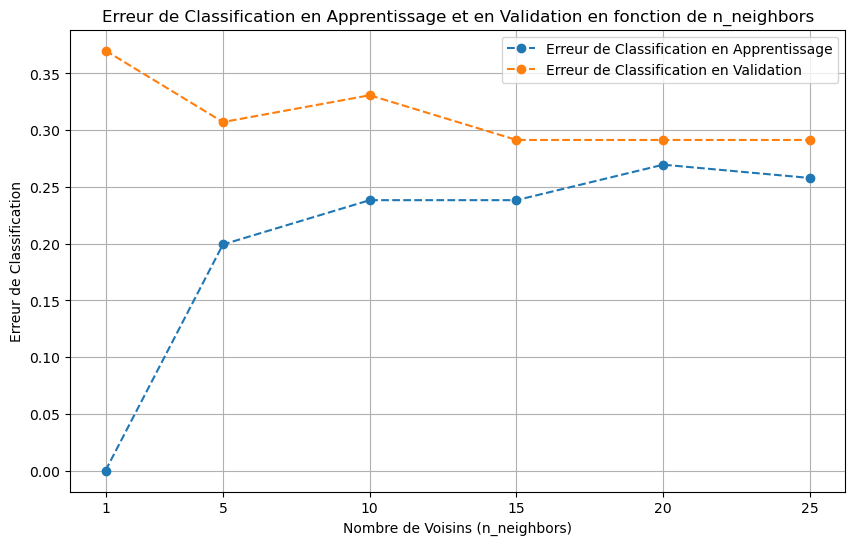

In [202]:
train_errors = [1 - accuracy_train for accuracy_train in results_df['Accuracy_train']]
test_errors = [1 - accuracy_test for accuracy_test in results_df['Accuracy_v']]

plt.figure(figsize=(10, 6))
plt.plot(p_k, train_errors, marker='o', label='Erreur de Classification en Apprentissage', linestyle='--')
plt.plot(p_k, test_errors, marker='o', label='Erreur de Classification en Validation', linestyle='--')
plt.xlabel('Nombre de Voisins (n_neighbors)')
plt.ylabel('Erreur de Classification')
plt.title('Erreur de Classification en Apprentissage et en Validation en fonction de n_neighbors')
plt.xticks(p_k)
plt.legend()
plt.grid(True)

plt.show()
# Minimise l erreur sur la validation -> n = 20 

In [203]:
best_n_neighbors = 20

best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn_classifier.fit(X_a, Y_a)

Y_test_predicted = best_knn_classifier.predict(X_t)
test_accuracy = accuracy_score(Y_t, Y_test_predicted)

print(f"Meilleur modèle (n_neighbors={best_n_neighbors}) - Erreur de test : {1 - test_accuracy}")

Meilleur modèle (n_neighbors=20) - Erreur de test : 0.6666666666666667


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# Partie 2

In [204]:
X_av, X_t, Y_av, Y_t = train_test_split(X, Y, test_size=0.5)
X_a, X_v, Y_a, Y_v = train_test_split(X_av, Y_av, test_size=0.33)

scaler = StandardScaler()

X_av = scaler.fit_transform(X_av) 
X_a = scaler.fit_transform(X_a) # Référence
X_v = scaler.fit_transform(X_v)

In [205]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

knn_classifier = KNeighborsClassifier(n_neighbors=5)
num_folds = 5

stratified_kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

scores = cross_val_score(knn_classifier, X_av, Y_av, cv=stratified_kfold, scoring='accuracy')

mean_accuracy = scores.mean()
std_accuracy = scores.std()

print(f"Scores de la validation croisée (K={num_folds}): {scores}")
print(f"Exactitude moyenne: {mean_accuracy}")
print(f"Écart-type de l'exactitude: {std_accuracy}")

Scores de la validation croisée (K=5): [0.71428571 0.80519481 0.74025974 0.78947368 0.80263158]
Exactitude moyenne: 0.7703691045796309
Écart-type de l'exactitude: 0.03652561327383178


In [206]:
for i in p_k :
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    num_folds = 5

    stratified_kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)

    scores = cross_val_score(knn_classifier, X_av, Y_av, cv=stratified_kfold, scoring='accuracy')

    mean_accuracy = scores.mean()
    std_accuracy = scores.std()

    print(f"Nombre de voisins : {i}")
    print(f"Scores de la validation croisée (K={num_folds}): {scores}")
    print(f"Exactitude moyenne: {mean_accuracy}")
    print(f"Écart-type de l'exactitude: {std_accuracy} \n ")

Nombre de voisins : 1
Scores de la validation croisée (K=5): [0.66233766 0.85714286 0.76623377 0.73684211 0.72368421]
Exactitude moyenne: 0.7492481203007519
Écart-type de l'exactitude: 0.06370343287674744 
 
Nombre de voisins : 5
Scores de la validation croisée (K=5): [0.71428571 0.80519481 0.74025974 0.78947368 0.80263158]
Exactitude moyenne: 0.7703691045796309
Écart-type de l'exactitude: 0.03652561327383178 
 
Nombre de voisins : 10
Scores de la validation croisée (K=5): [0.75324675 0.84415584 0.81818182 0.76315789 0.76315789]
Exactitude moyenne: 0.78838004101162
Écart-type de l'exactitude: 0.0360714495784877 
 
Nombre de voisins : 15
Scores de la validation croisée (K=5): [0.75324675 0.84415584 0.80519481 0.78947368 0.80263158]
Exactitude moyenne: 0.7989405331510595
Écart-type de l'exactitude: 0.029239380424123485 
 
Nombre de voisins : 20
Scores de la validation croisée (K=5): [0.75324675 0.83116883 0.77922078 0.78947368 0.78947368]
Exactitude moyenne: 0.7885167464114833
Écart-type

In [207]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

p_k = [1, 5, 10, 15, 20, 25]

best_n_neighbors = None
best_mean_accuracy = 0 

for k in p_k:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    num_folds = 5 

    stratified_kfold = StratifiedKFold(n_splits=num_folds, random_state=42, shuffle=True)
    scores = cross_val_score(knn_classifier, X_av, Y_av, cv=stratified_kfold, scoring='accuracy')
    mean_accuracy = scores.mean() 

    if mean_accuracy > best_mean_accuracy:
        best_mean_accuracy = mean_accuracy
        best_n_neighbors = k

print(f"Meilleure valeur de n_neighbors : {best_n_neighbors}")
print(f"Meilleure exactitude moyenne : {best_mean_accuracy}")

Meilleure valeur de n_neighbors : 25
Meilleure exactitude moyenne : 0.8251879699248121


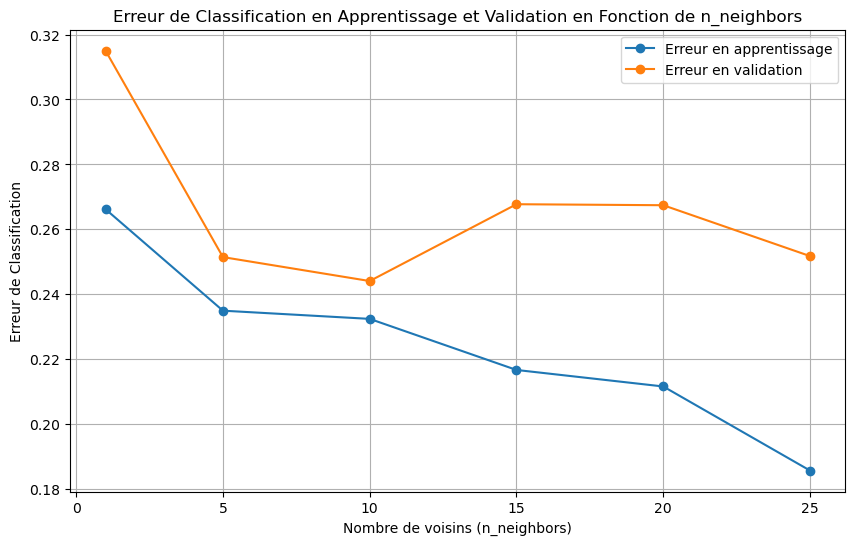

In [208]:
train_errors = []
val_errors = []

for k in p_k:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    num_folds = 5 

    stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True)

    train_scores = cross_val_score(knn_classifier, X_av, Y_av, cv=stratified_kfold, scoring='accuracy')
    val_scores = cross_val_score(knn_classifier, X_v, Y_v, cv=stratified_kfold, scoring='accuracy')

    train_errors.append(1 - train_scores.mean())
    val_errors.append(1 - val_scores.mean())      

errors_df = pd.DataFrame({'n_neighbors': p_k, 'Train_Error': train_errors, 'Validation_Error': val_errors})

plt.figure(figsize=(10, 6))
plt.plot(errors_df['n_neighbors'], errors_df['Train_Error'], label='Erreur en apprentissage', marker='o')
plt.plot(errors_df['n_neighbors'], errors_df['Validation_Error'], label='Erreur en validation', marker='o')

plt.title("Erreur de Classification en Apprentissage et Validation en Fonction de n_neighbors")
plt.xlabel("Nombre de voisins (n_neighbors)")
plt.ylabel("Erreur de Classification")
plt.legend()
plt.grid(True)
plt.show()

In [209]:
best_n_neighbors = 10

best_knn_classifier = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn_classifier.fit(X_av, Y_av)

Y_test_predicted = best_knn_classifier.predict(X_t)
test_accuracy = accuracy_score(Y_t, Y_test_predicted)

print(f"Meilleur modèle (n_neighbors={best_n_neighbors}) - Erreur de test : {1 - test_accuracy}")

Meilleur modèle (n_neighbors=10) - Erreur de test : 0.640625


/Users/pierre/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# Exercice 3

In [210]:
health_data = pd.read_csv('./Maternal Health Risk Data Set.csv')
display(health_data)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [218]:
from sklearn.preprocessing import LabelEncoder

Y = health_data['RiskLevel']
X = health_data.drop('RiskLevel', axis=1) 

X_av, X_t, Y_av, Y_t = train_test_split(X, Y, test_size=0.5)

scaler = StandardScaler()

X_av = scaler.fit_transform(X_av) 
X_t = scaler.fit_transform(X_t) 

label_encoder = LabelEncoder()

Y_av = label_encoder.fit_transform(Y_av)
Y_t = label_encoder.transform(Y_t)

knn_classifier = KNeighborsClassifier(n_neighbors=3) 

knn_classifier.fit(X_av, Y_av)

Y_1_predicted = knn_classifier.predict(X_av)
Y_2_predicted = knn_classifier.predict(X_t)

In [220]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_train = accuracy_score(Y_av, Y_1_predicted)
classification_report_train = classification_report(Y_av, Y_1_predicted)
confusion_matrix_train = confusion_matrix(Y_av, Y_1_predicted)

# Métriques de test
accuracy_test = accuracy_score(Y_t, Y_2_predicted)
classification_report_test = classification_report(Y_t, Y_2_predicted)
confusion_matrix_test = confusion_matrix(Y_t, Y_2_predicted)

print("Métriques d'apprentissage :")
print(f"Exactitude : {accuracy_train}")
print("Rapport de classification :\n", classification_report_train)
print("Matrice de confusion :\n", confusion_matrix_train)

print("\nMétriques de test :")
print(f"Exactitude : {accuracy_test}")
print("Rapport de classification :\n", classification_report_test)
print("Matrice de confusion :\n", confusion_matrix_test)

Métriques d'apprentissage :
Exactitude : 0.8382642998027613
Rapport de classification :
               precision    recall  f1-score   support

           0       0.84      0.89      0.87       151
           1       0.88      0.83      0.86       193
           2       0.79      0.79      0.79       163

    accuracy                           0.84       507
   macro avg       0.84      0.84      0.84       507
weighted avg       0.84      0.84      0.84       507

Matrice de confusion :
 [[135   6  10]
 [  7 161  25]
 [ 19  15 129]]

Métriques de test :
Exactitude : 0.6094674556213018
Rapport de classification :
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       121
           1       0.67      0.66      0.67       213
           2       0.48      0.43      0.45       173

    accuracy                           0.61       507
   macro avg       0.61      0.62      0.61       507
weighted avg       0.60      0.61      0.61       50